In [2]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# June 2024
# License: MIT

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [4]:
from sklearn.datasets import fetch_olivetti_faces

X, y = fetch_olivetti_faces(return_X_y=True)

In [5]:
X.shape

(400, 4096)

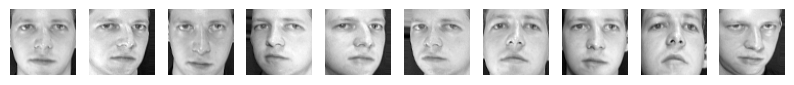

In [6]:
n_faces = 10
fig, axes = plt.subplots(1, n_faces, figsize=(10, 10))
image_shape = (64, 64)

for ax, image in zip(axes, X[:n_faces]):
    ax.imshow(image.reshape(image_shape), cmap='gray')
    ax.axis('off')
    
plt.savefig('figures/olivetti_faces.pdf', bbox_inches='tight')

Create the Training and Test Sets

In [7]:
# Separate images of individuals not seen during training
train = X[y < 35]  # Training set: individuals 0 to 34
test = X[y >= 35]  # Test set: individuals 35 to 39

In [8]:
n_pixels = X.shape[1]
n_half = n_pixels // 2

# Upper half of the faces used as input
X_train = train[:, :n_half]
X_test = test[:, :n_half]

# Lower half of the faces used as output
Y_train = train[:, n_half:]
Y_test = test[:, n_half:]

Fit a Regression Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [11]:
from sklearn.metrics import mean_absolute_error as MAE

Y_train_pred = model.predict(X_train)
print(f'MAE (train): {MAE(Y_train, Y_train_pred):.4f}')
Y_test_pred = model.predict(X_test)
print(f'MAE (test): {MAE(Y_test, Y_test_pred):.4f}')

MAE (train): 0.0000
MAE (test): 0.1335


Plot the Reconstructed Faces

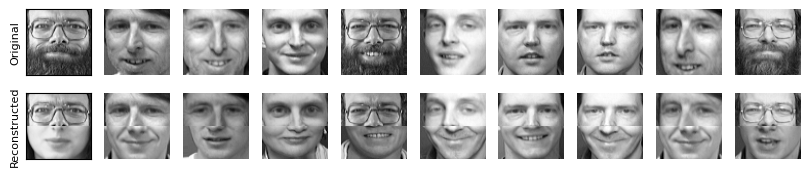

In [10]:
# Choose 10 random test images
n_test_faces = 10
face_ids = np.random.RandomState(42).choice(len(X_test), size=n_test_faces, replace=False)

# Plot the original and reconstructed faces
fig, axes = plt.subplots(2, n_test_faces, figsize=(10, 2))
for i, face_id in enumerate(face_ids):
    original_face = test[face_id]
    # Combine the original upper half with the predicted lower half
    reconstructed_face = np.hstack((X_test[face_id], Y_test_pred[face_id]))    
    
    axes[0, i].imshow(original_face.reshape(image_shape), cmap='gray')
    axes[1, i].imshow(reconstructed_face.reshape(image_shape), cmap='gray')

    if i == 0:
        # Label the first column and hide ticks
        axes[0, i].set_ylabel('Original', size=8)
        axes[1, i].set_ylabel('Reconstructed', size=8)
        for row in range(2):
            axes[row, i].set_xticks([])        
            axes[row, i].set_yticks([])           
    else:
        # Hide axes for the other columns
        axes[0, i].axis('off')
        axes[1, i].axis('off')                             
                            
plt.savefig('figures/olivetti_reconstructed_faces.pdf', bbox_inches='tight')